In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from math import e
ln = np.log  

In [2]:
plt.style.use(['science', 'notebook', 'grid'])

In [3]:
data=pd.read_csv("C:/Users/brint/Documents/GitHub/GS_RR/data.csv")

In [4]:
data

,Mesh size (mm),Fraction (g),Fraction (%),Cumulative % weight passing
0,0.71,1.0,1.39,1.39
1,1.00,1.7,2.36,3.75
2,1.40,8.6,11.94,15.69
3,2.00,7.2,10.00,25.69
4,2.80,17.7,24.58,50.28
5,4.00,20.5,28.47,78.75
6,5.60,11.4,15.83,94.58
7,8.00,2.3,3.19,97.78
8,11.20,1.6,2.22,100.00


In [5]:
np_arr=data.values
x_data= np_arr[:,0]
y_data= np_arr[:,3]

In [6]:
x_data

array([ 0.71,  1.  ,  1.4 ,  2.  ,  2.8 ,  4.  ,  5.6 ,  8.  , 11.2 ])

In [7]:
y_data

array([  1.39,   3.75,  15.69,  25.69,  50.28,  78.75,  94.58,  97.78,
       100.  ])

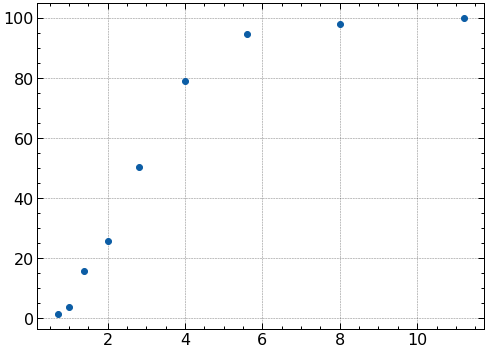

In [8]:
plt.scatter(x_data,y_data)
plt.show()

**GGS estimation

In [9]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
def GGS(x,a,k):
    return ((x/k)**a)

In [10]:
popt,pcov=curve_fit(GGS,x_data,y_data,p0=[0.5,0.01])

In [11]:
popt

array([0.70685916, 0.0130392 ])

In [12]:
pcov

array([[0.02280473, 0.00262817],
       [0.00262817, 0.00030574]])

In [13]:
a_opt,k_opt =popt
x_model=np.linspace(min(x_data),max(x_data),500)
y_model=GGS(x_model,a_opt,k_opt)

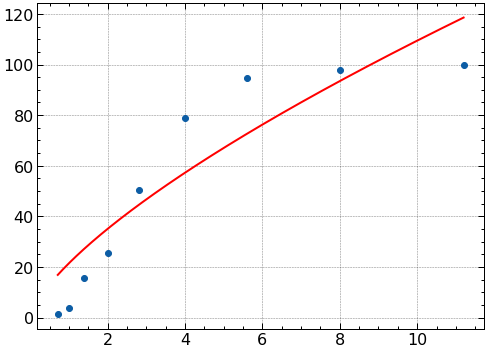

In [14]:
plt.scatter((x_data),(y_data))
plt.plot(x_model,y_model,color='r')
plt.show()

In [15]:
# Optimal values for the parameters so that the sum of the squared residuals of f(xdata, *popt) - ydata is minimized.
popt

array([0.70685916, 0.0130392 ])

In [16]:
# The estimated covariance of popt. The diagonals provide the variance of the parameter estimate.
pcov

array([[0.02280473, 0.00262817],
       [0.00262817, 0.00030574]])

In [17]:
# To compute one standard deviation errors on the parameters use 
perr = np.sqrt(np.diag(pcov))
perr

array([0.15101235, 0.01748545])

**RR estimation

In [18]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
def RR(x,m,k):
    return (1-np.exp(-(x/k)**m))*100

In [19]:
popt_2,pcov_2=curve_fit(RR,x_data,y_data,p0=[1.3,1.5])

In [20]:
popt_2

array([2.2769255 , 3.31602664])

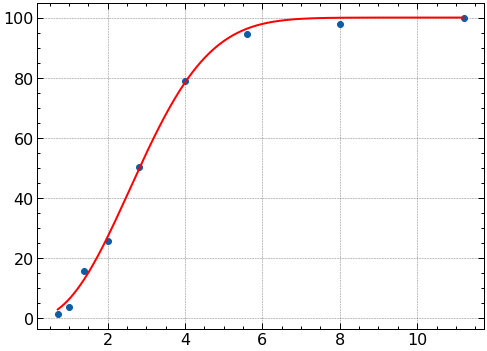

In [21]:
a_opt,k_opt =popt_2
x_model_2=np.linspace(min(x_data),max(x_data),500)
y_model_2=RR(x_model,a_opt,k_opt)
plt.scatter(x_data,y_data)
plt.plot(x_model_2,y_model_2,color='r')
plt.show()

In [53]:
perr_2 = np.sqrt(np.diag(pcov_2))
perr_2

array([0.09828322, 0.05304714])